In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import ensemble


In [1]:
df = pd.read_csv('/content/drive/MyDrive/FYP Dataset Final/dengue_features_train.csv')

print(df.head())


  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_precip_amt_kg_per_m2  reanalysis_relative_humidity_percent  \
0                            32.00                             73.365714   
1           

In [2]:
df_labels = pd.read_csv('/content/drive/MyDrive/FYP Dataset Final/dengue_labels_train.csv')
print(df_labels.head())


  city  year  weekofyear  total_cases
0   sj  1990          18            4
1   sj  1990          19            5
2   sj  1990          20            4
3   sj  1990          21            3
4   sj  1990          22            6


In [3]:
combined_df = pd.merge(df, df_labels, on=['city', 'year', 'weekofyear'])
print(combined_df.head())


  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1                 

In [4]:
combined_df

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1451,iq,2010,21,2010-05-28,0.342750,0.318900,0.256343,0.292514,55.30,299.334286,...,88.765714,55.30,18.485714,9.800000,28.633333,11.933333,35.4,22.4,27.0,5
1452,iq,2010,22,2010-06-04,0.160157,0.160371,0.136043,0.225657,86.47,298.330000,...,91.600000,86.47,18.070000,7.471429,27.433333,10.500000,34.7,21.7,36.6,8
1453,iq,2010,23,2010-06-11,0.247057,0.146057,0.250357,0.233714,58.94,296.598571,...,94.280000,58.94,17.008571,7.500000,24.400000,6.900000,32.2,19.2,7.4,1
1454,iq,2010,24,2010-06-18,0.333914,0.245771,0.278886,0.325486,59.67,296.345714,...,94.660000,59.67,16.815714,7.871429,25.433333,8.733333,31.2,21.0,16.0,1


In [6]:
sj_data = combined_df[combined_df['city'] == 'sj']
iq_data = combined_df[combined_df['city'] == 'iq']

print("San Juan Data:")
print(sj_data.head())

print("\nIquitos Data:")
print(iq_data.head())


San Juan Data:
  city  year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se  \
0   sj  1990          18      1990-04-30  0.122600  0.103725  0.198483   
1   sj  1990          19      1990-05-07  0.169900  0.142175  0.162357   
2   sj  1990          20      1990-05-14  0.032250  0.172967  0.157200   
3   sj  1990          21      1990-05-21  0.128633  0.245067  0.227557   
4   sj  1990          22      1990-05-28  0.196200  0.262200  0.251200   

    ndvi_sw  precipitation_amt_mm  reanalysis_air_temp_k  ...  \
0  0.177617                 12.42             297.572857  ...   
1  0.155486                 22.82             298.211429  ...   
2  0.170843                 34.54             298.781429  ...   
3  0.235886                 15.36             298.987143  ...   
4  0.247340                  7.52             299.518571  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_precip_amt_mm  \
0                             73.365714                         12.42   
1  

In [7]:
sj_data = sj_data.drop('city', axis=1)
print(sj_data.head())


   year  weekofyear week_start_date   ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  \
0  1990          18      1990-04-30  0.122600  0.103725  0.198483  0.177617   
1  1990          19      1990-05-07  0.169900  0.142175  0.162357  0.155486   
2  1990          20      1990-05-14  0.032250  0.172967  0.157200  0.170843   
3  1990          21      1990-05-21  0.128633  0.245067  0.227557  0.235886   
4  1990          22      1990-05-28  0.196200  0.262200  0.251200  0.247340   

   precipitation_amt_mm  reanalysis_air_temp_k  reanalysis_avg_temp_k  ...  \
0                 12.42             297.572857             297.742857  ...   
1                 22.82             298.211429             298.442857  ...   
2                 34.54             298.781429             298.878571  ...   
3                 15.36             298.987143             299.228571  ...   
4                  7.52             299.518571             299.664286  ...   

   reanalysis_relative_humidity_percent  reanalysis_sat_

In [9]:
sj_data.to_csv('sj_data.csv', index=False)


In [10]:
iq_data = iq_data.drop('city', axis=1)

In [11]:
iq_data.to_csv('iq_data.csv', index=False)


In [15]:
iq_data = iq_data.drop('week_start_date', axis=1)
sj_data = sj_data.drop('week_start_date', axis=1)


In [16]:
sj_correlation_matrix = sj_data.corr(method='pearson')

print("San Juan Correlation Matrix:")
print(sj_correlation_matrix)


iq_correlation_matrix = iq_data.corr(method='pearson')

print("\nIquitos Correlation Matrix:")
print(iq_correlation_matrix)


San Juan Correlation Matrix:
                                           year  weekofyear   ndvi_ne  \
year                                   1.000000   -0.073143 -0.392312   
weekofyear                            -0.073143    1.000000 -0.020271   
ndvi_ne                               -0.392312   -0.020271  1.000000   
ndvi_nw                               -0.498367   -0.023549  0.673037   
ndvi_se                               -0.014863   -0.009380  0.234049   
ndvi_sw                               -0.077928   -0.075804  0.177792   
precipitation_amt_mm                   0.031612    0.231961 -0.048727   
reanalysis_air_temp_k                  0.185813    0.575381 -0.073170   
reanalysis_avg_temp_k                  0.189696    0.561001 -0.071176   
reanalysis_dew_point_temp_k            0.015428    0.578072 -0.040008   
reanalysis_max_air_temp_k              0.177772    0.519083 -0.044553   
reanalysis_min_air_temp_k              0.105355    0.574494 -0.096176   
reanalysis_precip_amt_

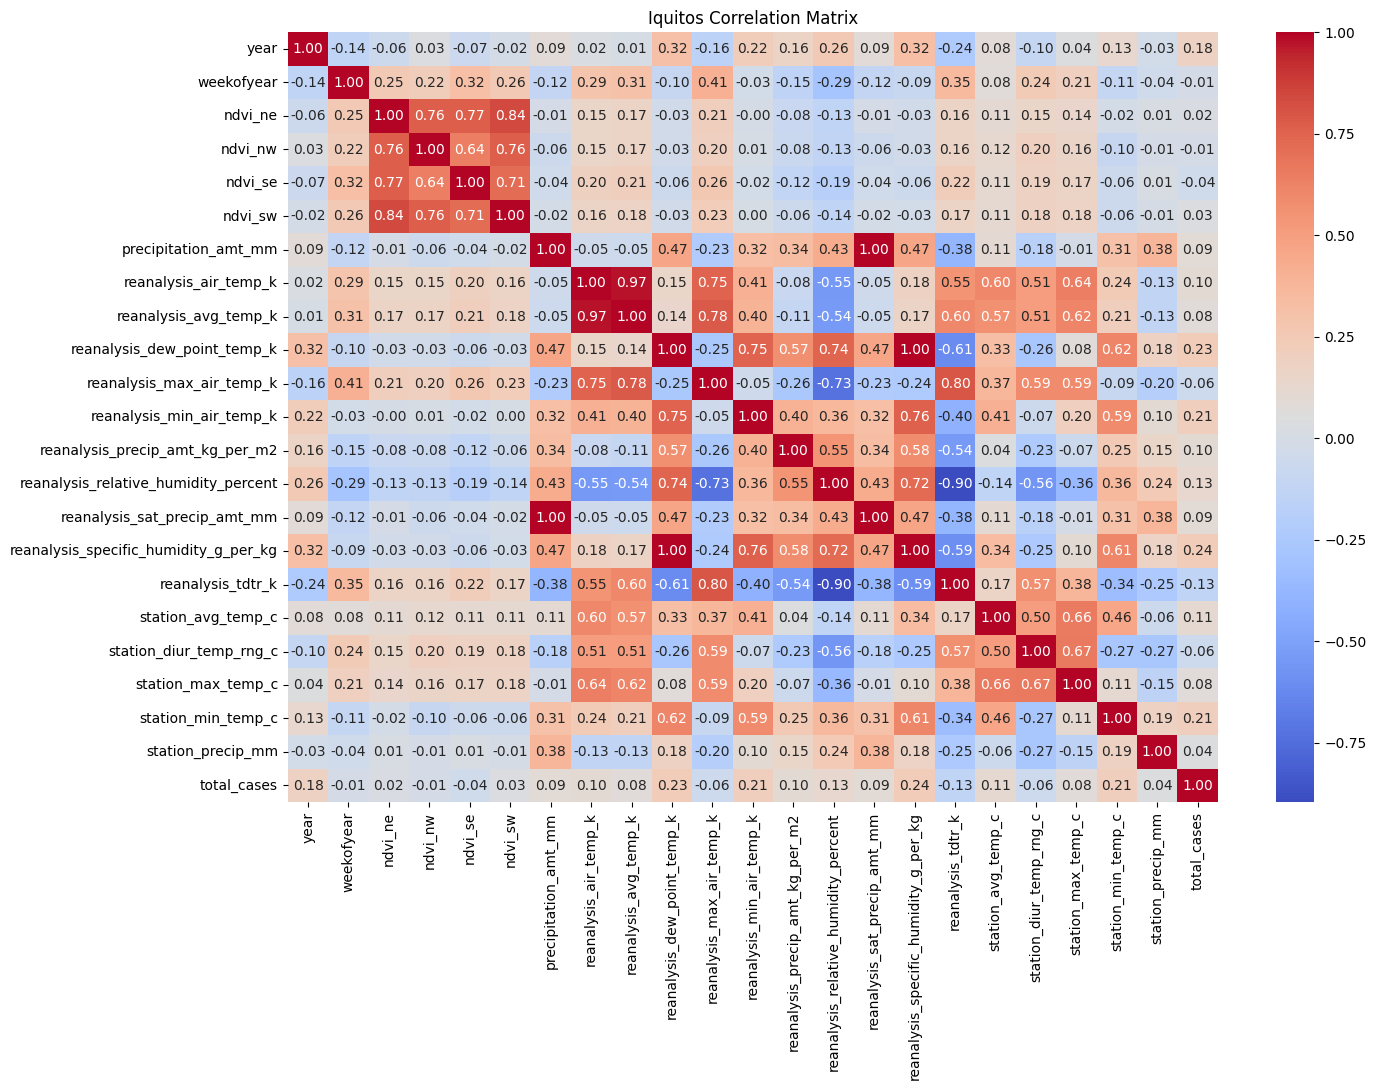

In [19]:
plt.figure(figsize=(15, 10))
sns.heatmap(iq_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Iquitos Correlation Matrix")
plt.show()

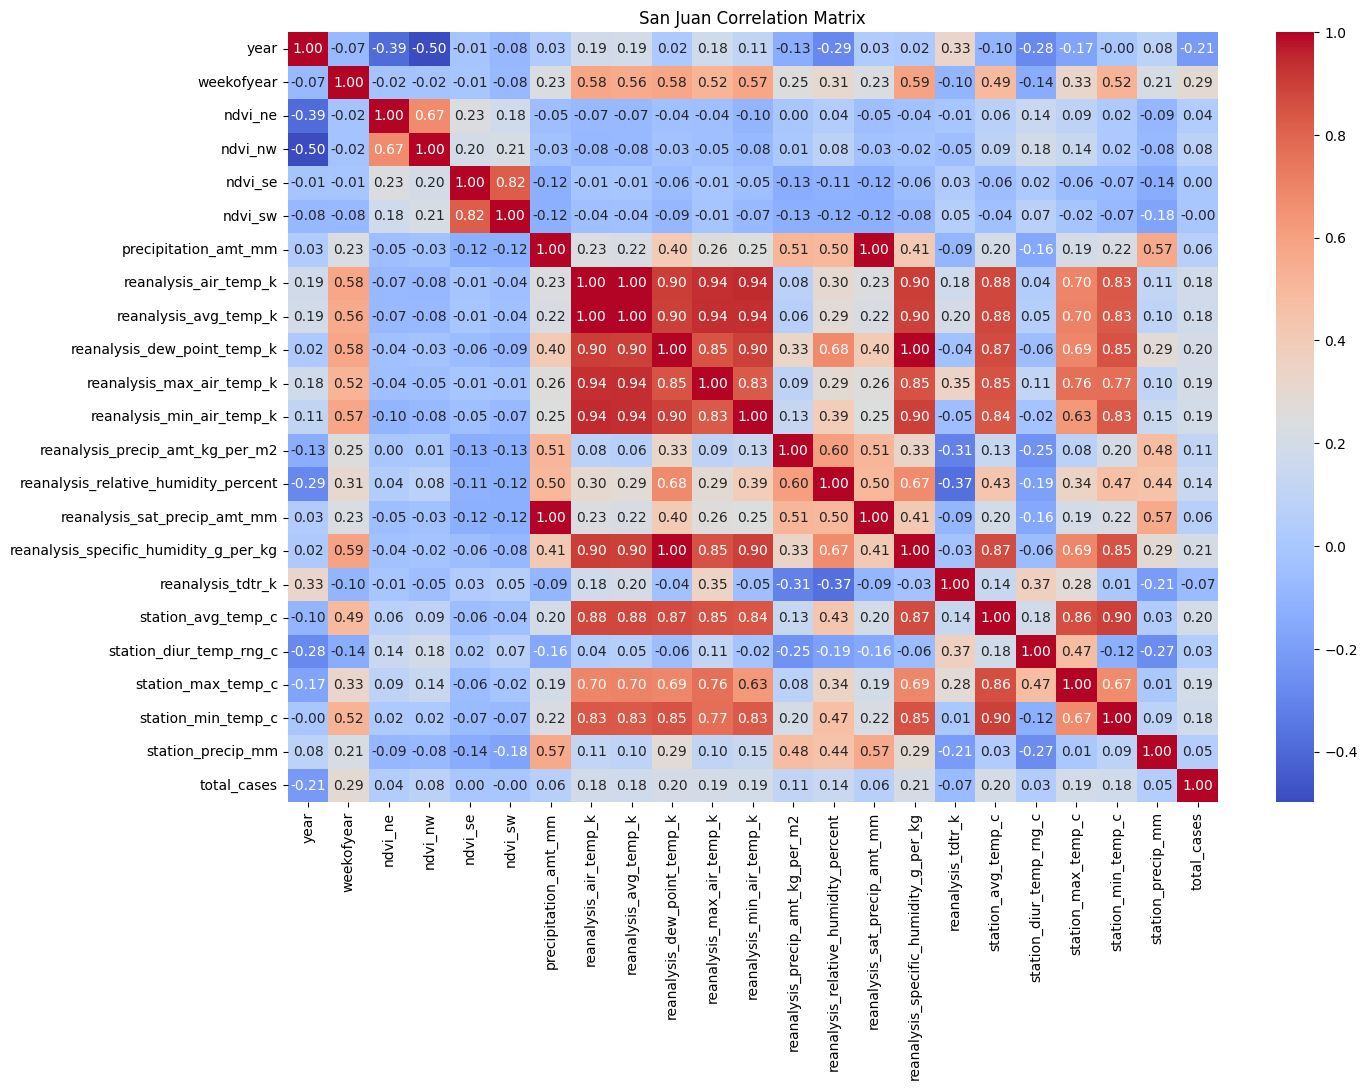

In [18]:
plt.figure(figsize=(15, 10))
sns.heatmap(sj_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("San Juan Correlation Matrix")
plt.show()


In [20]:
print(sj_data.columns)

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')


In [21]:
sj_data = sj_data.drop('ndvi_ne', axis=1)
sj_data = sj_data.drop('ndvi_nw', axis=1)
sj_data = sj_data.drop('ndvi_se', axis=1)
sj_data = sj_data.drop('ndvi_sw', axis=1)



sj_data = sj_data.drop('precipitation_amt_mm', axis=1)
sj_data = sj_data.drop('reanalysis_air_temp_k', axis=1)
sj_data = sj_data.drop('reanalysis_max_air_temp_k', axis=1)
sj_data = sj_data.drop('reanalysis_min_air_temp_k', axis=1)


sj_data = sj_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)
sj_data = sj_data.drop('reanalysis_relative_humidity_percent', axis=1)
sj_data = sj_data.drop('reanalysis_sat_precip_amt_mm', axis=1)
sj_data = sj_data.drop('reanalysis_tdtr_k', axis=1)
sj_data = sj_data.drop('station_diur_temp_rng_c', axis=1)




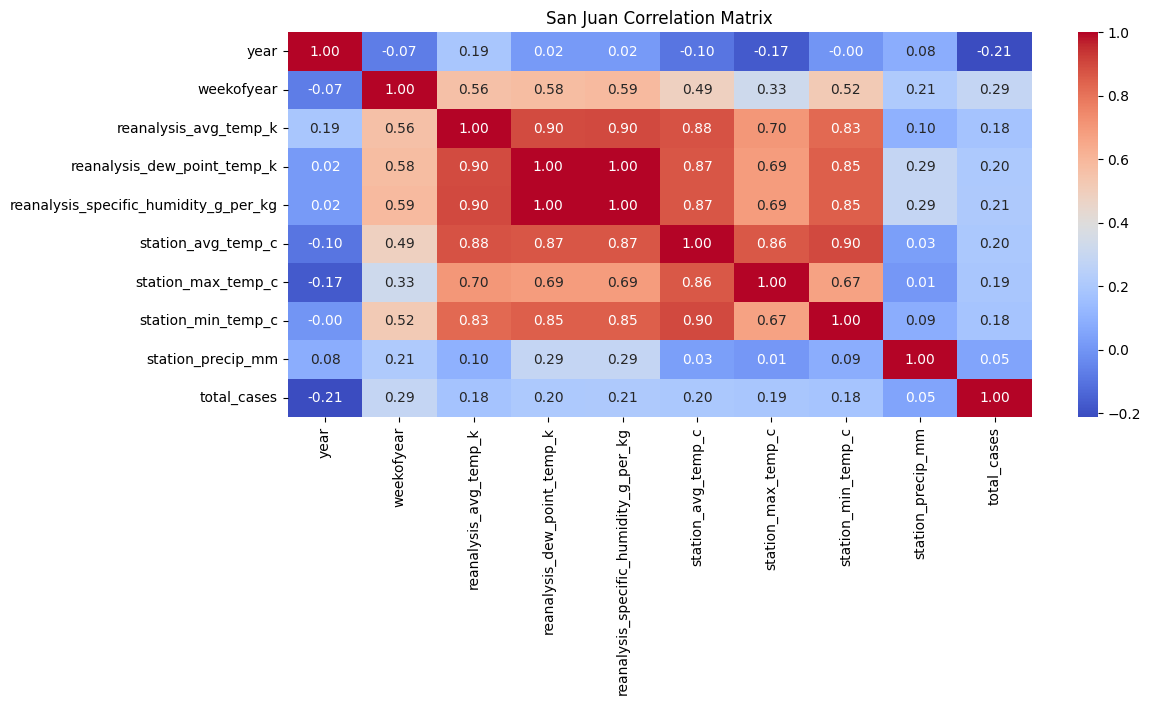

In [27]:
sj_correlation_matrix = sj_data.corr(method='pearson')

plt.figure(figsize=(12, 5))
sns.heatmap(sj_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("San Juan Correlation Matrix")
plt.show()


In [28]:
iq_data = iq_data.drop('ndvi_ne', axis=1)
iq_data = iq_data.drop('ndvi_nw', axis=1)
iq_data = iq_data.drop('ndvi_se', axis=1)
iq_data = iq_data.drop('ndvi_sw', axis=1)



iq_data = iq_data.drop('precipitation_amt_mm', axis=1)
iq_data = iq_data.drop('reanalysis_air_temp_k', axis=1)
iq_data = iq_data.drop('reanalysis_max_air_temp_k', axis=1)
iq_data = iq_data.drop('reanalysis_min_air_temp_k', axis=1)


iq_data = iq_data.drop('reanalysis_precip_amt_kg_per_m2', axis=1)
iq_data = iq_data.drop('reanalysis_relative_humidity_percent', axis=1)
iq_data = iq_data.drop('reanalysis_sat_precip_amt_mm', axis=1)
iq_data = iq_data.drop('reanalysis_tdtr_k', axis=1)
iq_data = iq_data.drop('station_diur_temp_rng_c', axis=1)




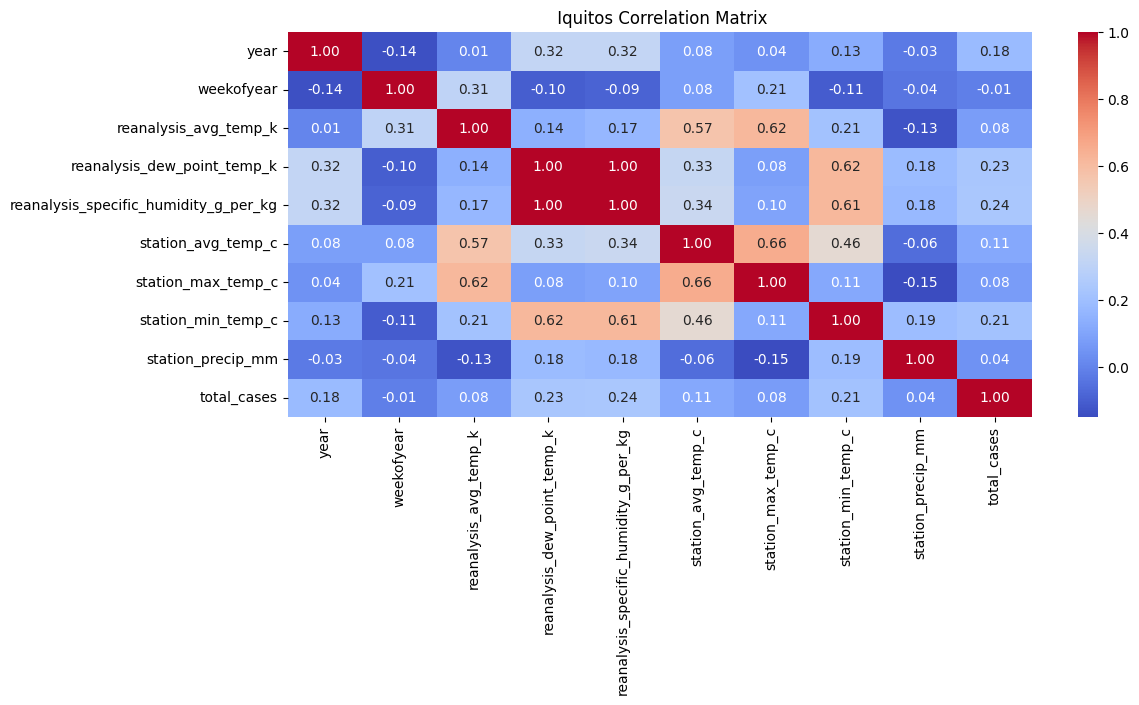

In [30]:
iq_correlation_matrix = iq_data.corr(method='pearson')

plt.figure(figsize=(12, 5))
sns.heatmap(iq_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title(" Iquitos Correlation Matrix")
plt.show()


In [32]:
ProcessedData = sj_data.apply(lambda x: x.fillna(method='ffill'))

<ipython-input-32-5faf2e6f367d>:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ProcessedData = sj_data.apply(lambda x: x.fillna(method='ffill'))


In [33]:
c=["reanalysis_avg_temp_k","reanalysis_dew_point_temp_k"]

for i in c:
    ProcessedData[i] = ProcessedData[i] - 273.15

In [34]:
ProcessedData

,year,weekofyear,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,1990,18,24.592857,19.264286,14.012857,25.442857,29.4,20.0,16.0,4
1,1990,19,25.292857,20.801429,15.372857,26.714286,31.7,22.2,8.6,5
2,1990,20,25.728571,22.284286,16.848571,26.714286,32.2,22.8,41.4,4
3,1990,21,26.078571,22.160000,16.672857,27.471429,33.3,23.3,4.0,3
4,1990,22,26.514286,22.671429,17.210000,28.942857,35.0,23.9,5.8,6
...,...,...,...,...,...,...,...,...,...,...
931,2008,13,23.807143,18.945714,13.644286,25.042857,30.0,21.1,1.8,4
932,2008,14,25.078571,20.085714,14.662857,26.242857,30.6,22.2,0.5,3
933,2008,15,24.414286,19.582857,14.184286,25.000000,29.4,21.7,30.7,1
934,2008,16,24.628571,19.124286,13.858571,25.314286,29.4,21.7,11.2,3


In [35]:
for index in list(ProcessedData):
    print(index,"-->",ProcessedData[index].var())

year --> 27.165734265734436
weekofyear --> 225.6577437268615
reanalysis_avg_temp_k --> 1.4879078227632698
reanalysis_dew_point_temp_k --> 2.465136099567736
reanalysis_specific_humidity_g_per_kg --> 2.435668323547452
station_avg_temp_c --> 2.002448106284689
station_max_temp_c --> 2.955285159285154
station_min_temp_c --> 2.2688839526486535
station_precip_mm --> 856.3846162987347
total_cases --> 2640.045439691045


In [36]:
iq_data['total_cases'].fillna((iq_data['total_cases'].mean()), inplace=True)
sj_data['total_cases'].fillna((sj_data['total_cases'].mean()), inplace=True)

<ipython-input-36-1fa3774ea52e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iq_data['total_cases'].fillna((iq_data['total_cases'].mean()), inplace=True)
<ipython-input-36-1fa3774ea52e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [37]:
iq_data = iq_data.assign(Lag_by_1_Week=iq_data['total_cases'].shift(-1))
iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))
iq_data['Lag_by_1_Week'] = iq_data['Lag_by_1_Week'].astype(int)

<ipython-input-37-8f16059dcc01>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))


In [38]:
iq_data = iq_data.assign(Lag_by_2_Weeks=iq_data['total_cases'].shift(-2))
iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))
iq_data['Lag_by_2_Weeks'] = iq_data['Lag_by_2_Weeks'].astype(int)

<ipython-input-38-3f18beb36b4e>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  iq_data = iq_data.apply(lambda x: x.fillna(method='ffill'))


In [39]:
iq_data

,year,weekofyear,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_specific_humidity_g_per_kg,station_avg_temp_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases,Lag_by_1_Week,Lag_by_2_Weeks
936,2000,26,298.450000,295.184286,16.651429,26.400000,32.5,20.7,3.0,0,0,0
937,2000,27,298.428571,295.358571,16.862857,26.900000,34.0,20.8,55.6,0,0,0
938,2000,28,297.392857,295.622857,17.120000,26.800000,33.0,20.7,38.1,0,0,0
939,2000,29,296.228571,292.797143,14.431429,25.766667,31.5,14.7,30.0,0,0,0
940,2000,30,297.635714,293.957143,15.444286,26.600000,33.3,19.1,4.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1451,2010,21,300.771429,296.825714,18.485714,28.633333,35.4,22.4,27.0,5,8,1
1452,2010,22,299.392857,296.452857,18.070000,27.433333,34.7,21.7,36.6,8,1,1
1453,2010,23,297.592857,295.501429,17.008571,24.400000,32.2,19.2,7.4,1,1,4
1454,2010,24,297.521429,295.324286,16.815714,25.433333,31.2,21.0,16.0,1,4,4


In [40]:
sj_data = sj_data.assign(Lag_by_1_Week=sj_data['total_cases'].shift(-1))
sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))
sj_data['Lag_by_1_Week'] = sj_data['Lag_by_1_Week'].astype(int)

<ipython-input-40-bcf72a4e0626>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))


In [41]:
sj_data = sj_data.assign(Lag_by_2_Weeks=sj_data['total_cases'].shift(-2))
sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))
sj_data['Lag_by_2_Weeks'] = sj_data['Lag_by_2_Weeks'].astype(int)

<ipython-input-41-eec041dfd70a>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  sj_data = sj_data.apply(lambda x: x.fillna(method='ffill'))


### Splitting the Train and Test data for Iq

In [42]:
IQ_X=iq_data.iloc[:,:-3]
IQ_Y=iq_data.iloc[:,-2:-1]

In [43]:
IQ_X_Train, IQ_X_Test, IQ_Y_Train, IQ_Y_Test = train_test_split(IQ_X, IQ_Y, test_size = 0.2)

# Standardizing

In [44]:
scaler = StandardScaler()

scaler.fit(IQ_X_Train)

StandardScaler()

# Random Forest

In [45]:
IQ_X_Train = scaler.transform(IQ_X_Train)
IQ_X_Test = scaler.transform(IQ_X_Test)

In [46]:
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(IQ_X_Train, IQ_Y_Train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(max_depth=2, random_state=0)

In [47]:
IQ_Predicted=regr.predict(IQ_X_Test)

In [48]:
IQ_Predicted

array([ 1.67547457,  9.93528202,  6.39143829,  7.19815051, 10.40999407,
        1.37584718,  6.53501387,  6.45772881,  7.70896043,  7.16635379,
        7.7512292 ,  5.70168219,  1.90374153,  1.37584718, 11.22494596,
        6.63838048,  6.39143829,  1.55603455,  8.09616925,  9.65989649,
       13.05705183,  7.74907382, 15.954202  ,  9.17757812,  6.52486939,
       14.66150825, 12.88800904,  1.37584718,  7.05536404,  6.39143829,
        7.74907382,  8.03396937,  9.38509192,  1.62795153,  2.10046865,
        7.74907382, 10.34239752,  7.61163068,  1.37584718,  7.83027954,
        6.44606162,  9.79332759, 11.69927271, 10.09422218,  6.39143829,
        7.9657383 , 15.93458824,  1.37584718, 11.53749255, 10.21988707,
        6.39143829,  6.39143829,  6.63838048,  6.39143829,  6.42847126,
        8.49455822, 10.33500732,  6.39143829, 15.90601811,  8.49455822,
       11.97175371,  6.45682914,  1.37584718,  5.51015816,  8.02403719,
       12.41212557,  1.37584718,  7.74907382,  6.39143829, 10.24

In [49]:
IQ_result = mean_absolute_error(IQ_Y_Test, IQ_Predicted)

In [50]:
IQ_result

5.760058900041011

In [53]:
IQ_result_MSE = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted))

IQ_result_MSE

10.25629227399446

In [54]:
regr = RandomForestRegressor(max_depth=3, random_state=0)
regr.fit(IQ_X_Train, IQ_Y_Train)

IQ_Predicted=regr.predict(IQ_X_Test)


IQ_result = mean_absolute_error(IQ_Y_Test, IQ_Predicted)



IQ_result_MSE = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted))

IQ_result,IQ_result_MSE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(5.629932497958, 10.014159176427798)

In [55]:
regr = RandomForestRegressor(max_depth=3, random_state=0, max_features='log2')
regr.fit(IQ_X_Train, IQ_Y_Train)

IQ_Predicted=regr.predict(IQ_X_Test)


IQ_result = mean_absolute_error(IQ_Y_Test, IQ_Predicted)



IQ_result_MSE = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted))

IQ_result,IQ_result_MSE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(5.902290979018378, 10.201413001535549)

In [56]:
regr = RandomForestRegressor(max_depth=10, random_state=1, max_features='log2',min_samples_split=3)
regr.fit(IQ_X_Train, IQ_Y_Train)

IQ_Predicted=regr.predict(IQ_X_Test)


IQ_result = mean_absolute_error(IQ_Y_Test, IQ_Predicted)



IQ_result_MSE = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted))

IQ_result,IQ_result_MSE

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(5.7637447048006445, 10.088671535422614)

# Applying Gradient Boosting for IQ


In [58]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


In [59]:
IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))


In [60]:
IQ_result_MSE_Gradient_Boosting


9.997017100355347

In [61]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)


In [62]:
IQ_result_MAE_Gradient_Boosting


5.623644751613697

In [64]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.829326119462227

In [65]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

5.370056880654449

In [67]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'absolute_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.864737891322209

In [68]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

4.61555958573712

In [69]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'absolute_error', 'criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(IQ_X_Train, IQ_Y_Train)
IQ_Predicted_Gradient_Boosting = clf.predict(IQ_X_Test)

IQ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting))

IQ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


9.703653205265892

In [70]:
IQ_result_MAE_Gradient_Boosting = mean_absolute_error(IQ_Y_Test, IQ_Predicted_Gradient_Boosting)

IQ_result_MAE_Gradient_Boosting

4.547334406228964

# For Saun Juan

In [71]:

SJ_X=sj_data.iloc[:,:-3]
SJ_Y=sj_data.iloc[:,-1:]


SJ_X_Train, SJ_X_Test, SJ_Y_Train, SJ_Y_Test = train_test_split(SJ_X, SJ_Y, test_size = 0.2)

scaler = StandardScaler()

scaler.fit(SJ_X_Train)

SJ_X_Train = scaler.transform(SJ_X_Train)
SJ_X_Test = scaler.transform(SJ_X_Test)

In [73]:
params = {'n_estimators': 500, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.935889174634184, 18.950640606896865)

In [75]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'squared_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.96745666498261, 20.030352648411682)

In [76]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'absolute_error'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.371660631335631, 25.816159537997002)

In [77]:
params = {'n_estimators': 500, 'max_depth': 5, 'min_samples_split': 3,
          'learning_rate': 0.01, 'loss': 'absolute_error', 'criterion':'friedman_mse'}
clf = ensemble.GradientBoostingRegressor(**params)

clf.fit(SJ_X_Train, SJ_Y_Train)
SJ_Predicted_Gradient_Boosting = clf.predict(SJ_X_Test)

SJ_result_MSE_Gradient_Boosting = math.sqrt(mean_squared_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting))
SJ_result_MAE_Gradient_Boosting = mean_absolute_error(SJ_Y_Test, SJ_Predicted_Gradient_Boosting)

SJ_result_MAE_Gradient_Boosting, SJ_result_MSE_Gradient_Boosting

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:668: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


(11.40661356871303, 25.391910302150027)

<Figure size 640x480 with 0 Axes>

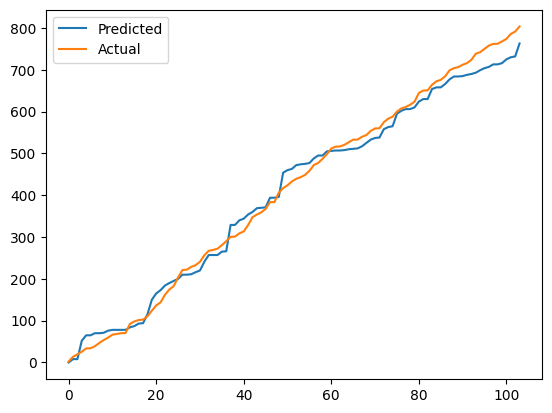

In [78]:
SJ_Y_Test_np_array = np.array(IQ_Y_Test)
SJ_Y_Predicted_np_array = np.array(IQ_Predicted)
df = pd.DataFrame(SJ_Y_Test_np_array,columns=['Predicted'])
df1 = df.cumsum()

df = pd.DataFrame(SJ_Y_Predicted_np_array, columns=['Actual'])

df2 = df.cumsum()
plt.figure();

ax=df1.plot();
df2.plot(ax=ax);
plt.show();